# Heart Disease Prediction

In this project, we will train a Machine Learning task to perform the task of heart disease prediction 
using Machine Learning. We will test several different models and choose the optimum model for our
predictive analysis.

In [39]:
#Let us start our project by importing some basic python libraries that are important to Data Processing
#and basic data manipulation

import pandas as pd #For dataframe operations
import matplotlib.pyplot as plt #For graphical operations
import seaborn as sns #For graphical operations
import numpy as np #For mathematical operations

In [40]:
#After importing our neccessary libraries we will move on to importing our dataset and understand our data

data = pd.read_csv("heart.csv") #importing the dataset
data.head() #printing the first 5 columns of our dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [41]:
data.shape

(303, 14)

### Attribute information
Let us have a look at the above data and understand what it all means because the most important part of 
Machine Learning is to understand the data and what every attribute signifies. A healthy practice of analyzing
and researching about the data is an important key to train better models

Age : Our first attribute age shows the different ages of patients that had taken part in the data collection survey.

Sex : Male and Female(1: male, 0: female)

cp : Chest Pain Type(0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)

trestbps : Resting blood pressure(in mm Hg on admission to the hospital)

chol : serum cholestoral in mg/dl

fbs : fasting blood sugar &gt; 120 mg/dl (1 = true; 0 = false)

restecg :  resting electrocardiographic results

thalach : maximum heart rate achieved

exang : exercise induced angina (1=yes, 0=no)

olddpeak : ST depression induced by exercise relative to rest

slope : the slope of the peak exercise ST segment

ca : number of major vessels (0-3) colored by flourosopy

thal : 1 = normal; 2 = fixed defect; 3 = reversable defect

target : 1 or 0

### Let us perform some EDA on this dataset to get some more insights

In [42]:
#Let us check our data for any null values

data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [43]:
#Our data is free from null values, let us check the summary of the dataset using the describe
#feature


pd.set_option("display.float", "{:.2f}".format)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


Text(0.5, 1.0, 'Target Ratio')

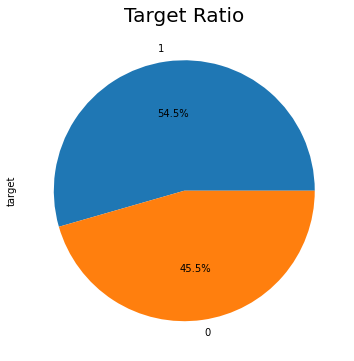

In [44]:
#Let us check if our data is evenly divided.

plt.figure(figsize=(13,6))
data.target.value_counts().plot.pie(autopct="%.1f%%")
plt.title("Target Ratio", fontsize = 20)
#plt.legend(['Benign','Malignant'])

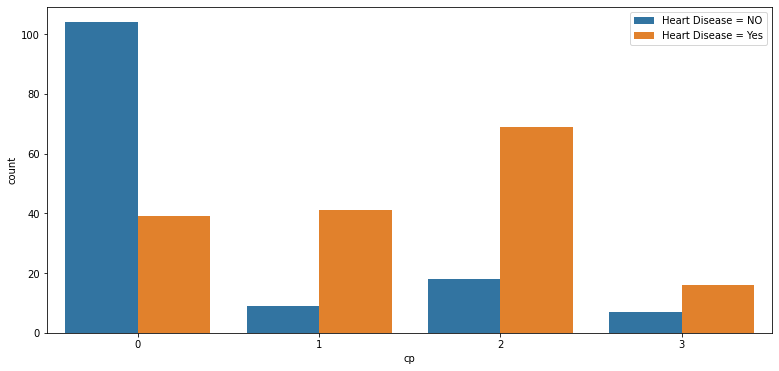

In [45]:
#Plot for the different chest pain types 

plt.figure(figsize=(13,6))
sns.countplot(data['cp'], hue=data['target'])
plt.legend(['Heart Disease = NO', 'Heart Disease = Yes'])

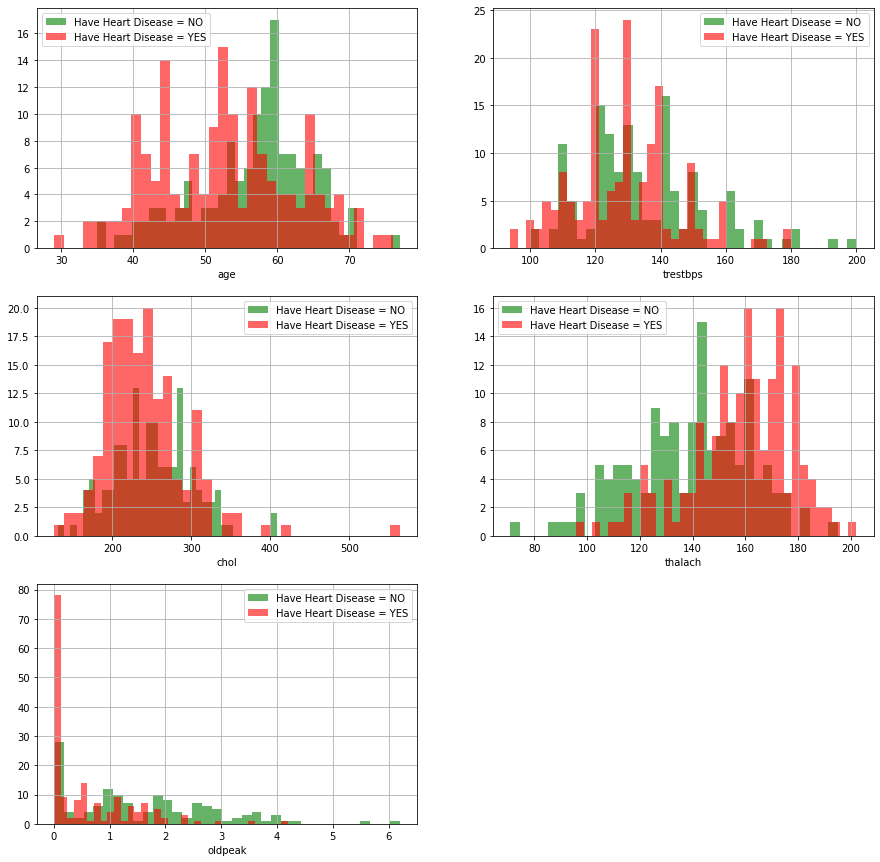

In [46]:
#We can observe that most people with type 2, i.e non-anginal pain have a heart disease

categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["target"] == 0][column].hist(bins=35, color='green', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<AxesSubplot:>

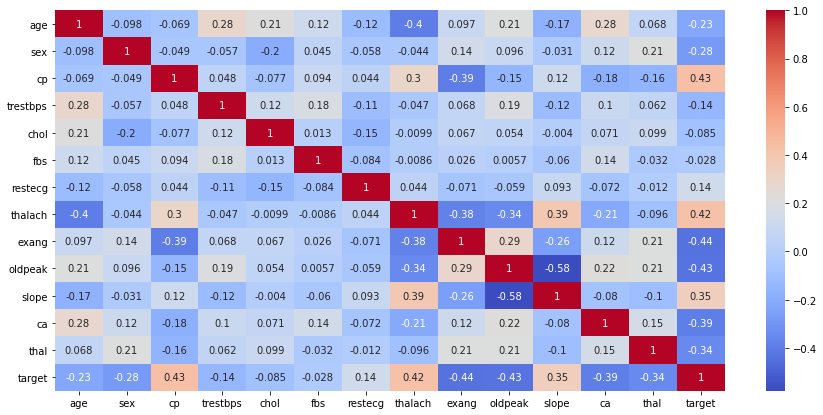

In [47]:
#From the above plots we can see deduce the following points

#A resting blood pressure avove 130 could be concerning
#Cholestrol level greater than 200 could be dangerous
#People having a heartrate above 140 could be concerning
#the old peak of exercise-induced ST depression vs. rest looks at heart stress
#during exercise an unhealthy heart will stress more.

#To get a better knowledge of how are attributes are correlated with eachother, 
#we will make use of the heatmap of  the seaborn module where we will be able to see our 
#correalted features

plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

Except for fasting blood sugar and cholestrol level, all other faetures have significant correlation
the target variable

With this we will now move on to preprocess our data and prepare it for modelling

### Data Preprocessing

In [48]:
#As we saw above, our dataset has many categorical columns. We should convert this categorical variables 
#to dummy variables and scale all our values before creating the model

categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
data[col_to_scale] = sc.fit_transform(data[col_to_scale])

In [49]:
data.to_csv("preprocessed_data.csv")

### Model Selection

In [50]:
#Let us split our data into training and testing sets

from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
#For selecting our model, we will use the model Lazypredict as it tests our processed data on 
#various models and resturn the results accordinglyfrom where we can then choose the best model
#as per our preference

import lazypredict
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|███████████████████████████████████████████| 29/29 [00:00<00:00, 39.24it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.87,0.87,0.87,0.87,0.01
LGBMClassifier,0.85,0.85,0.85,0.85,0.02
BernoulliNB,0.85,0.84,0.84,0.85,0.01
GaussianNB,0.84,0.84,0.84,0.84,0.01
NuSVC,0.84,0.83,0.83,0.84,0.02
RandomForestClassifier,0.84,0.83,0.83,0.83,0.13
NearestCentroid,0.84,0.83,0.83,0.83,0.02
Perceptron,0.82,0.82,0.82,0.82,0.01
SVC,0.82,0.82,0.82,0.82,0.01


In [52]:
#From the above table, we can see that KNN Classifier has the highest balanced accuracy out of all models

#Let us analyse this model futher

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

model_knnclassfier = KNeighborsClassifier()
model_knnclassfier.fit(X_train, y_train)
print('KNeighborsClassifier accuracy: {:.4f}'.format(accuracy_score(y_test, model_knnclassfier.predict(X_test))))

KNeighborsClassifier accuracy: 0.8462


Text(0.5, 1.0, 'Confusion Matrix')

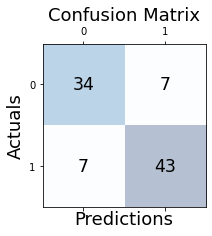

In [53]:
#A confusion matrix gives us an idea of the true positives, false positives, true negatives 
#and false negatives. It is a useful feature to gain more knowledge about our predictions

confusionmatrix = confusion_matrix(y_test, model_knnclassfier.predict(X_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [54]:
print(classification_report(y_test, model_knnclassfier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [55]:
#We have achieved a precision of 83%. Could we amplify this by parameter tuning?
#Lets test it out

### Hyper-Parameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 24


In [57]:
print('Tuned accuracy: {:.4f}'.format(accuracy_score(y_test, best_model.predict(X_test))))

Tuned accuracy: 0.8681


Text(0.5, 1.0, 'Confusion Matrix')

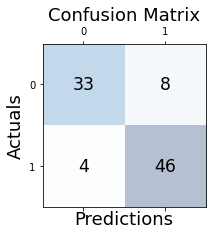

In [58]:
confusionmatrix = confusion_matrix(y_test, best_model.predict(X_test))

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusionmatrix.shape[0]):
    for j in range(confusionmatrix.shape[1]):
        ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [59]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.85      0.92      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



In [60]:
#As we can see, our model is now slightly better. It can surely improve by tuning it futher
#or by doing some more feature engineering.

In [61]:
predicted_tuned_values= pd.DataFrame({'Actual': y_test, 'Predicted': best_model.predict(X_test)})
predicted_tuned_values.to_csv("final_predictions_with_tuning.csv", index=False)
predicted_tuned_values

,Actual,Predicted
179,0,0
228,0,1
111,1,1
246,0,0
60,1,1
...,...,...
250,0,0
19,1,1
143,1,1
79,1,1
